In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import glob
import os
import seaborn as sns
is_ipython = 'inline' in matplotlib.get_backend()

In [2]:
path = "./Stats/" 
all_files = glob.glob(os.path.join(path, "*.csv"))

df = pd.concat((pd.read_csv(f, header = None) for f in all_files),axis=1)

df = df.T
df = df.rename(columns={0: "Resolution", 1: "Environment Type", 2: "Box Bumps", 3: "Wall Bumps", 4: "Loops", 5: "Steps", 6: "Reward"})
df['Resolution'] = df['Resolution'].astype(float).apply(int)
df = df.replace({"Resolution": 0}, 'normal')
df = df.sort_values(["Resolution", "Environment Type"], ascending=True)
df = df.replace({"Environment Type": 0}, 'simple')
df = df.replace({"Environment Type": 1}, 'complex')
df['Resolution'] = df['Resolution'].apply(str)
df = df.reset_index(drop = True)

df_no_normal = df.drop(df[df["Resolution"] == 'normal'].index)
df_no_normal['Resolution'] = df_no_normal['Resolution'].astype(float).apply(int)
df_no_normal['Resolution'] = df_no_normal['Resolution'] * df_no_normal['Resolution']

df_no_10 = df.drop(df[df.Resolution == '10'].index)
df_no_18 = df_no_10.drop(df_no_10[df_no_10.Resolution == '18'].index)
df_no_18["Resolution"] = "("+df_no_18["Resolution"].apply(str) + " x " + df_no_18["Resolution"].apply(str) +")"
df_no_18 = df_no_18.replace({"Resolution": "(normal x normal)"}, 'normal')

df_no_18 = df_no_18.reset_index(drop = True)

df.head(100)

,Resolution,Environment Type,Box Bumps,Wall Bumps,Loops,Steps,Reward
0,10,simple,33.4,81.2,97.0,2036.6,1336.4
1,10,simple,33.8,63.8,79.4,1603.2,2301.4
2,10,simple,30.8,70.2,71.6,1636.0,2499.0
3,10,complex,42.0,69.6,61.0,1560.8,2198.6
4,10,complex,46.6,134.8,156.6,2634.2,-220.6
5,10,complex,38.2,35.8,36.0,1373.2,3162.6
6,18,simple,19.6,10.0,5.2,713.0,4620.2
7,18,simple,11.6,6.8,3.2,701.2,4834.2
8,18,simple,9.6,5.0,6.0,779.8,5026.2
9,18,complex,22.6,16.2,25.2,1108.6,4044.6


In [3]:
df_no_normal.head(100)

,Resolution,Environment Type,Box Bumps,Wall Bumps,Loops,Steps,Reward
0,100,simple,33.4,81.2,97.0,2036.6,1336.4
1,100,simple,33.8,63.8,79.4,1603.2,2301.4
2,100,simple,30.8,70.2,71.6,1636.0,2499.0
3,100,complex,42.0,69.6,61.0,1560.8,2198.6
4,100,complex,46.6,134.8,156.6,2634.2,-220.6
5,100,complex,38.2,35.8,36.0,1373.2,3162.6
6,324,simple,19.6,10.0,5.2,713.0,4620.2
7,324,simple,11.6,6.8,3.2,701.2,4834.2
8,324,simple,9.6,5.0,6.0,779.8,5026.2
9,324,complex,22.6,16.2,25.2,1108.6,4044.6


In [4]:
reward_simple = df[(df.Resolution == 'normal')& (df["Environment Type"] == "simple")]['Reward'].mean()
reward_complex = df[(df.Resolution == 'normal')& (df["Environment Type"] == "complex")]['Reward'].mean()
box_bumps_simple = df[(df.Resolution == 'normal')& (df["Environment Type"] == "simple")]['Box Bumps'].mean()
box_bumps_complex = df[(df.Resolution == 'normal')& (df["Environment Type"] == "complex")]['Box Bumps'].mean()
wall_bumps_simple = df[(df.Resolution == 'normal')& (df["Environment Type"] == "simple")]['Wall Bumps'].mean()
wall_bumps_complex = df[(df.Resolution == 'normal')& (df["Environment Type"] == "complex")]['Wall Bumps'].mean()
loops_simple = df[(df.Resolution == 'normal')& (df["Environment Type"] == "simple")]['Loops'].mean()
loops_complex = df[(df.Resolution == 'normal')& (df["Environment Type"] == "complex")]['Loops'].mean()

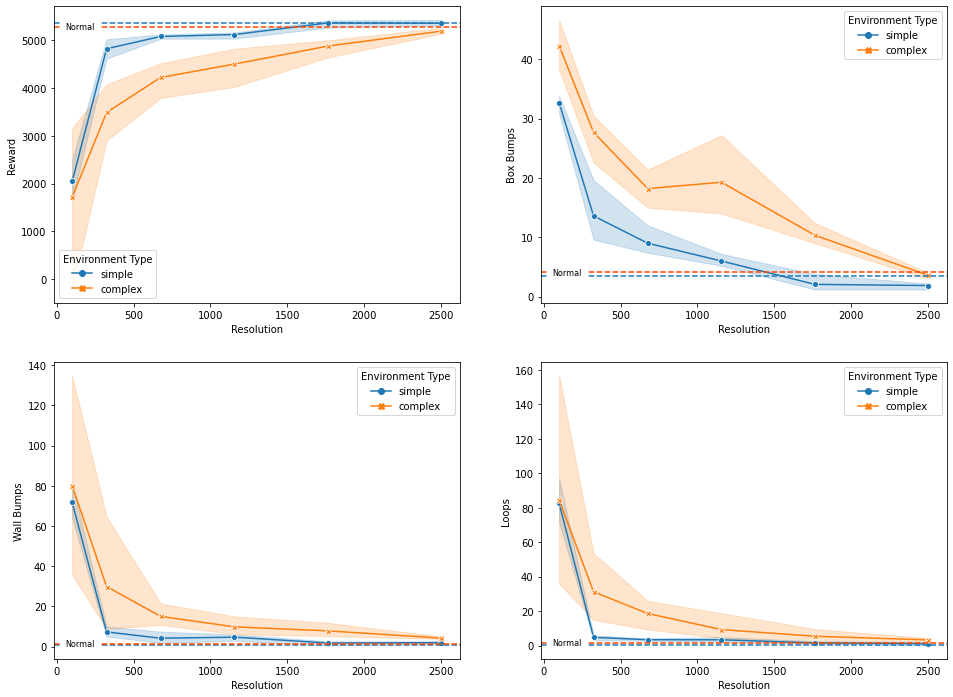

In [5]:
fig, axs = plt.subplots(2,2, figsize=(16,12))
sns.lineplot(x="Resolution",y="Reward", hue="Environment Type", style="Environment Type",markers=True,dashes=False, data=df_no_normal, ax=axs[0][0])
sns.lineplot(x="Resolution",y="Box Bumps", hue="Environment Type", style="Environment Type",markers=True,dashes=False, data=df_no_normal, ax=axs[0][1])
sns.lineplot(x="Resolution",y="Wall Bumps", hue="Environment Type", style="Environment Type",markers=True,dashes=False, data=df_no_normal, ax=axs[1][0])
sns.lineplot(x="Resolution",y="Loops",hue="Environment Type", style="Environment Type",markers=True,dashes=False, data=df_no_normal, ax=axs[1][1])
axs[0][0].axhline(reward_simple, ls='--')
axs[0][0].axhline(reward_complex, ls='--', color = 'orangered')
axs[0][0].text(150, reward_complex, 'Normal',fontsize=8, va='center', ha='center', backgroundcolor='w')

axs[0][1].axhline(box_bumps_simple, ls='--')
axs[0][1].axhline(box_bumps_complex, ls='--', color = 'orangered')
axs[0][1].text(150, box_bumps_complex, 'Normal',fontsize=8, va='center', ha='center', backgroundcolor='w')

axs[1][0].axhline(wall_bumps_simple, ls='--')
axs[1][0].axhline(wall_bumps_complex, ls='--', color = 'orangered')
axs[1][0].text(150, wall_bumps_complex, 'Normal',fontsize=8, va='center', ha='center', backgroundcolor='w')

axs[1][1].axhline(loops_simple, ls='--')
axs[1][1].axhline(loops_complex, ls='--', color = 'orangered')
axs[1][1].text(150, loops_complex, 'Normal',fontsize=8, va='center', ha='center', backgroundcolor='w')
plt.show()

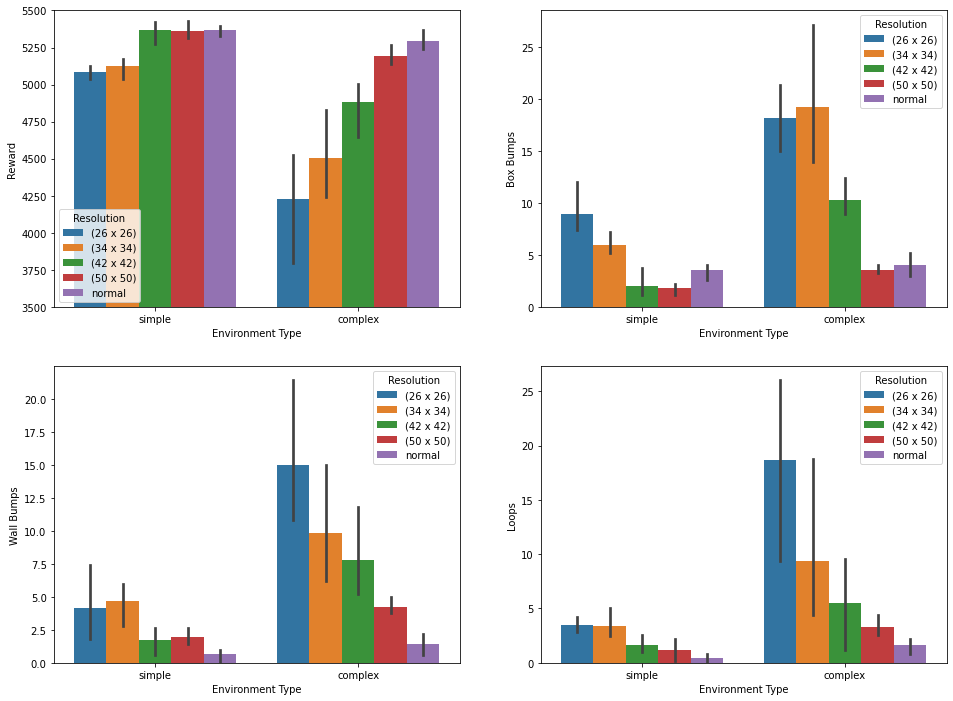

In [6]:
fig, axs = plt.subplots(2,2, figsize=(16,12))
axs[0][0].set(ylim=(3500,5500))
sns.barplot(x="Environment Type",y="Reward",hue="Resolution", data=df_no_18, ax=axs[0][0])
sns.barplot(x="Environment Type",y="Box Bumps",hue="Resolution", data=df_no_18, ax=axs[0][1])
sns.barplot(x="Environment Type",y="Wall Bumps",hue="Resolution", data=df_no_18, ax=axs[1][0])
sns.barplot(x="Environment Type",y="Loops",hue="Resolution", data=df_no_18, ax=axs[1][1])

plt.show()

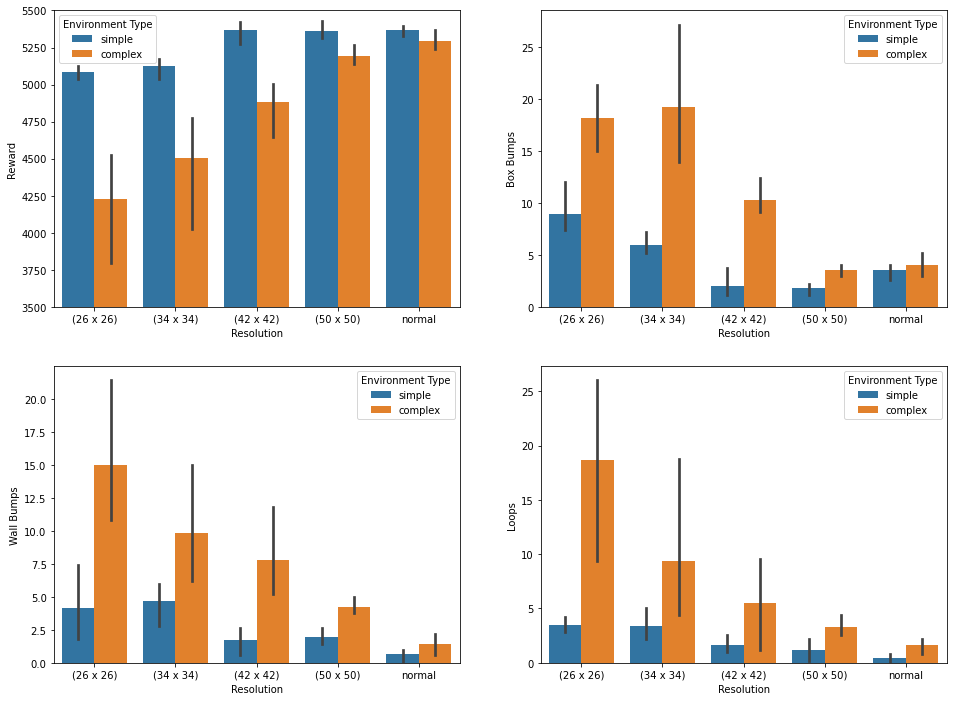

In [7]:
fig, axs = plt.subplots(2,2, figsize=(16,12))
axs[0][0].set(ylim=(3500,5500))
sns.barplot(x="Resolution",y="Reward",hue="Environment Type", data=df_no_18, ax=axs[0][0])
sns.barplot(x="Resolution",y="Box Bumps",hue="Environment Type", data=df_no_18, ax=axs[0][1])
sns.barplot(x="Resolution",y="Wall Bumps",hue="Environment Type", data=df_no_18, ax=axs[1][0])
sns.barplot(x="Resolution",y="Loops",hue="Environment Type", data=df_no_18, ax=axs[1][1])

plt.show()